In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data to DataFrame 'data'
data=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
#to display the first few columns
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
#to check for missing entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
#Descriptive Statistics
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


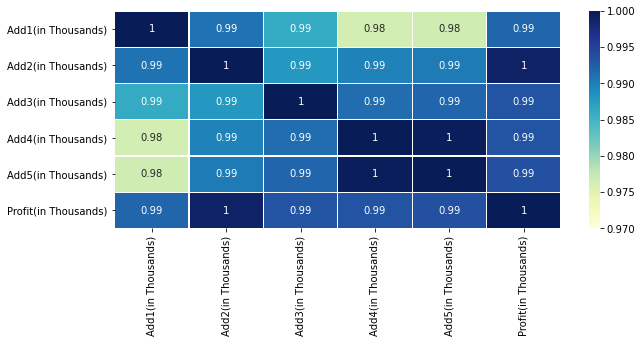

In [6]:
plt.subplots(figsize=(10,4))
sns.heatmap(data.corr(),vmin=0.97,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')
plt.show()

Insights:<br>1. It is observed from the above correlation matrix that there is high positive correlation between the amount 
spent for advertising through five different companies and profit generated.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [7]:
#dependent variable is stored in y
y=data['Profit(in Thousands)']
#independent variable is stored in x
x=data.drop(['Date', 'Profit(in Thousands)'],axis=1)

In [8]:
#splitting the dataset for training the model and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

# 2.1. Linear Regression Model

In [9]:
from sklearn import linear_model
#an instance of linear regression model is created and stored to variable lr
lr=linear_model.LinearRegression()

#fitting the instance to the training data
model1=lr.fit(x_train,y_train)

predictions1=model1.predict(x_test)

In [10]:
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(predictions1,y_test)
print('Mean of squared errors of the linear regression model is ',MSE1)

Mean of squared errors of the linear regression model is  8.11273293080854e-25


In [11]:
from sklearn.metrics import r2_score
lr_r2=r2_score(predictions1,y_test)
print('R2 value of the linear regression model is ',lr_r2)

R2 value of the linear regression model is  1.0


# 2.2 LASSO Model

In [12]:
l2=linear_model.Lasso(alpha=1)
model2=l2.fit(x_train,y_train)
predictions2=model2.predict(x_test)

In [13]:
MSE2=mean_squared_error(predictions2,y_test)
print('Mean of squared errors of the LASSO model is ',MSE2)
l2_r2=r2_score(predictions2,y_test)
print('R2 value of the LASSO model is ',l2_r2)

Mean of squared errors of the LASSO model is  0.5840411707385855
R2 value of the LASSO model is  0.9999972843412697


Here linear regression model has outperformed the LASSO model. Hence, can be chosen for further predictions.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands) 290 <br>
Add2(in Thousands) 312 <br>
Add3(in Thousands) 309 <br>
Add4(in Thousands) 298 <br>
Add5(in Thousands) 320

In [14]:
model1.predict(np.array([[290, 312,309,298,320]]))

array([5820.06])